**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Javier Alejandro Pérez Garza
*   MATRÍCULA: A01284386

In [72]:
#from google.colab import drive
#drive.mount('/content/drive')

In [73]:
#import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/Actividad4_EDA"
#os.chdir(DIR)

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


<span style="color: #FF8C00;">_Según el método `info()` en el dataframe se encuentran 8 columnas numéricas y 4 cualitativas._</span>

 2. Determina el porcentaje de valores faltantes por columna.

In [77]:
# Calcula el número de valores faltantes por cada columna
miss_values_count = df.isna().sum()
miss_values_count = miss_values_count[miss_values_count != 0]
miss_values_count

person_emp_length     895
loan_int_rate        3116
dtype: int64

In [78]:
#Calcula el porcentaje de valores faltantes por cada columna
percentage =  (miss_values_count / len(df)) * 100
percentage

person_emp_length    2.747000
loan_int_rate        9.563856
dtype: float64

<span style="color: #FF8C00;">_Para la columna `person_emp_length` el porcentaje de valores faltantes es de 2.74%, y para la columna `loan_int_rate` el porcentaje es de 9.56%. Para las demeás columnas el porcentaje de valores faltantes es del 0%._</span>

# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [79]:
#Dataframe con columnas numericas
numerical_df = df.select_dtypes(include=['number'])
numerical_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [80]:
#Crear dataframe con estadísticas descriptivas
stats = numerical_df.describe().T
skewness = numerical_df.skew().T
kurtosis = numerical_df.kurtosis().T
#Añadir asimetría y curtosis al dataframe
stats['skewness'] = skewness
stats['kurtosis'] = kurtosis
stats.rename(columns={'50%': 'median'}, inplace=True)
stats

,count,mean,std,min,25%,median,75%,max,skewness,kurtosis
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00,2.581393,18.560825
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00,32.865349,2693.272776
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00,2.614455,43.722338
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00,1.192477,1.423565
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22,0.208550,-0.671609
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00,1.364888,-0.137088
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83,1.064669,1.223687
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00,1.661790,3.716194


In [81]:
variables_df = stats.loc[['person_age', 'loan_int_rate'], ['skewness', 'kurtosis']]
variables_df

,skewness,kurtosis
person_age,2.581393,18.560825
loan_int_rate,0.208550,-0.671609


<span style="color: #FF8C00;">_Para describir la asimetría o sesgo (skewness), ya que ambas variables presentan valores positivos, en ambos cases se pueden clasificar a estas variables con una asimetría de cola derecha._</span>

<span style="color: #FF8C00;">_Por otro lado, para describir la curtosis (kurtosis), ahora si hay una diferencia entre ambas variables. Para la variable `person_age`, al tener un valor de curtosis positivo, se puede clasificar dentro de una distribución leptocúrtica, y la variable `loan_int_rate` debido a que tiene una curtosis negativa se puede clasificar dentro de una distribución platicúrtica._</span>

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

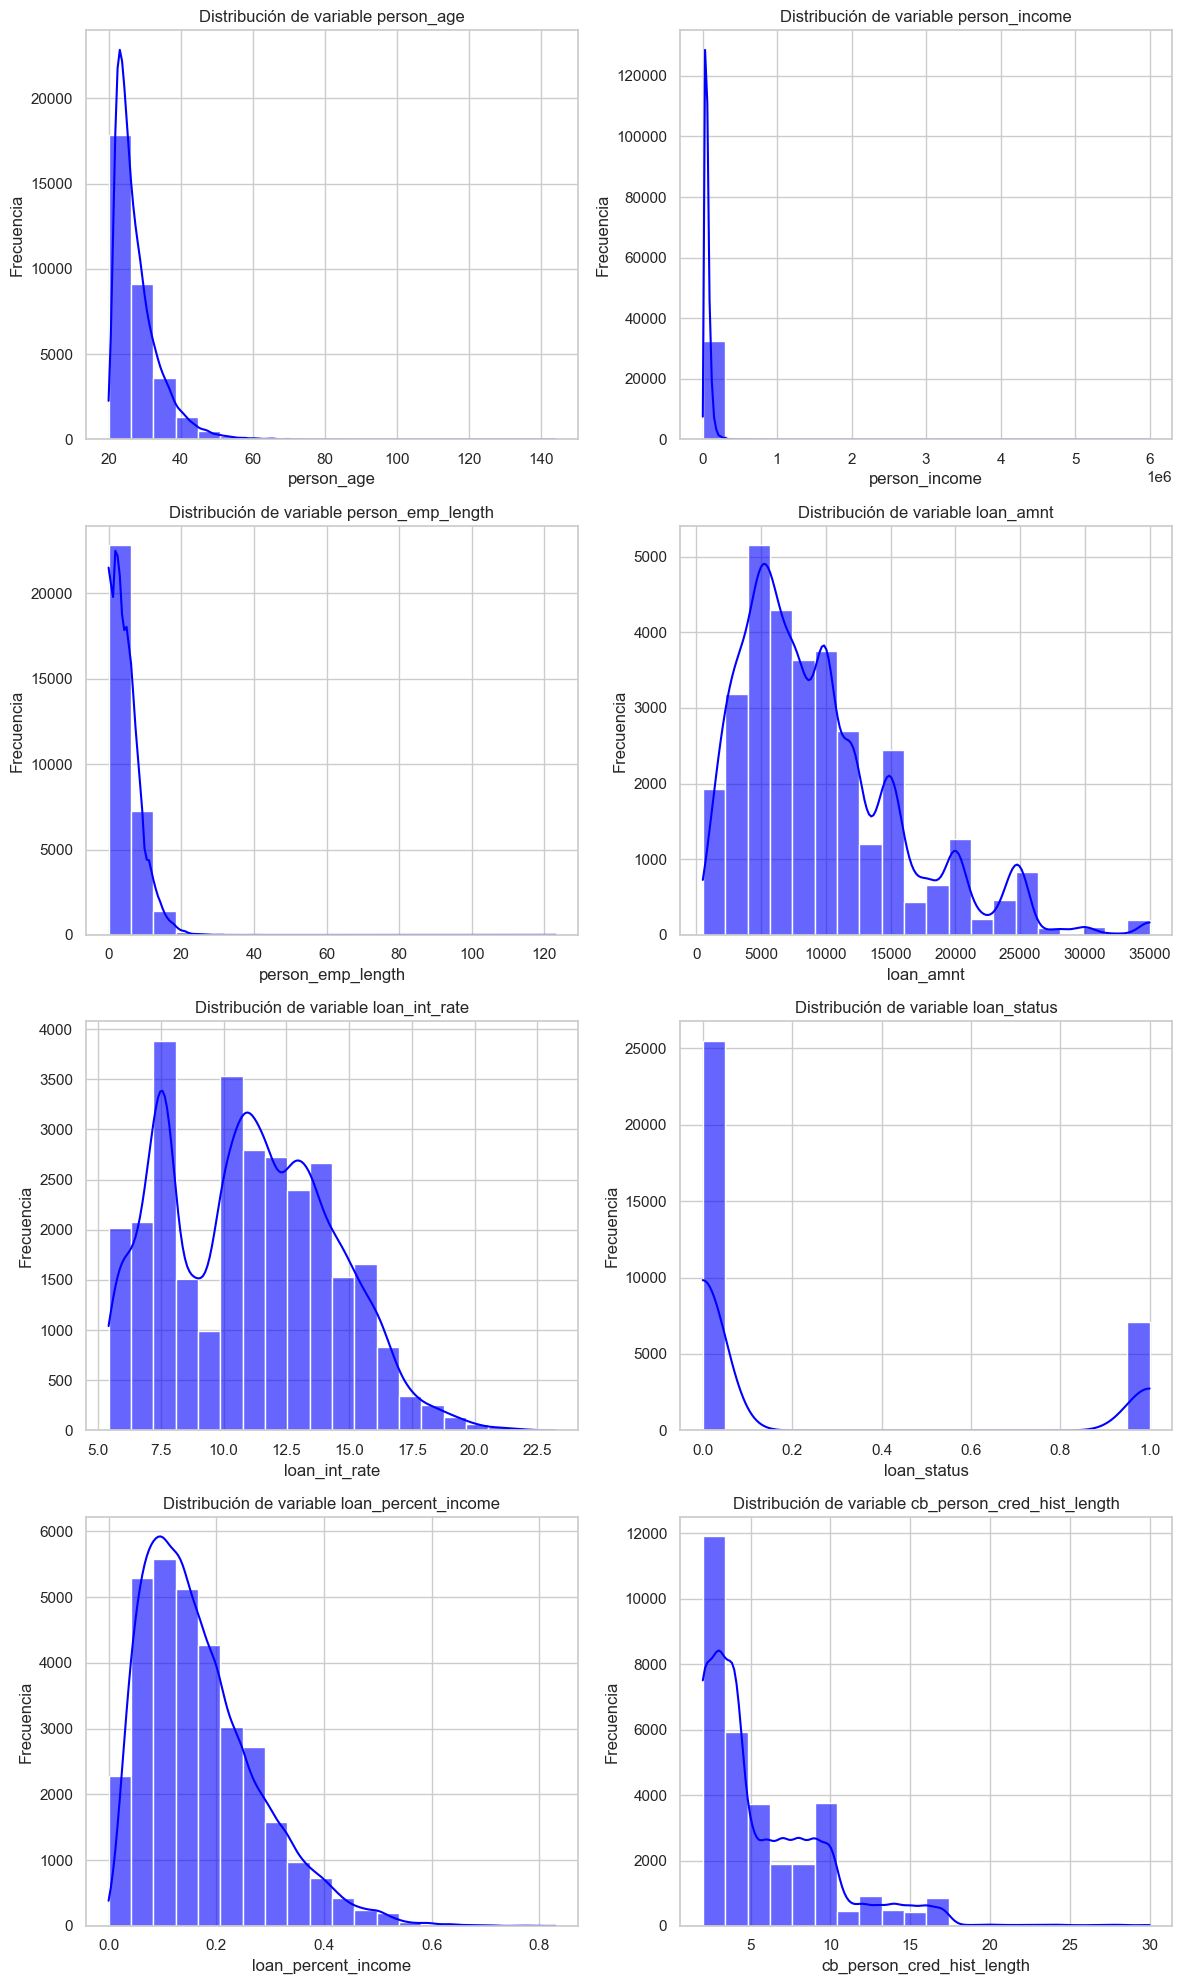

In [82]:
sns.set_theme(style="whitegrid")

# Definir como variable dataframe de valores numericos
variables = numerical_df.columns

# Calcular el número de filas para histogramas
n_vars = len(variables)
nrows = (n_vars + 1) // 2  

fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(12, nrows * 5))

for i, variable in enumerate(variables):
    # Histograma y KDE
    sns.histplot(numerical_df[variable], bins=20, kde=True, ax=axes[i // 2, i % 2], color='blue', alpha=0.6)
    axes[i // 2, i % 2].set_title(f'Distribución de variable {variable}')
    axes[i // 2, i % 2].set_xlabel(variable)
    axes[i // 2, i % 2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

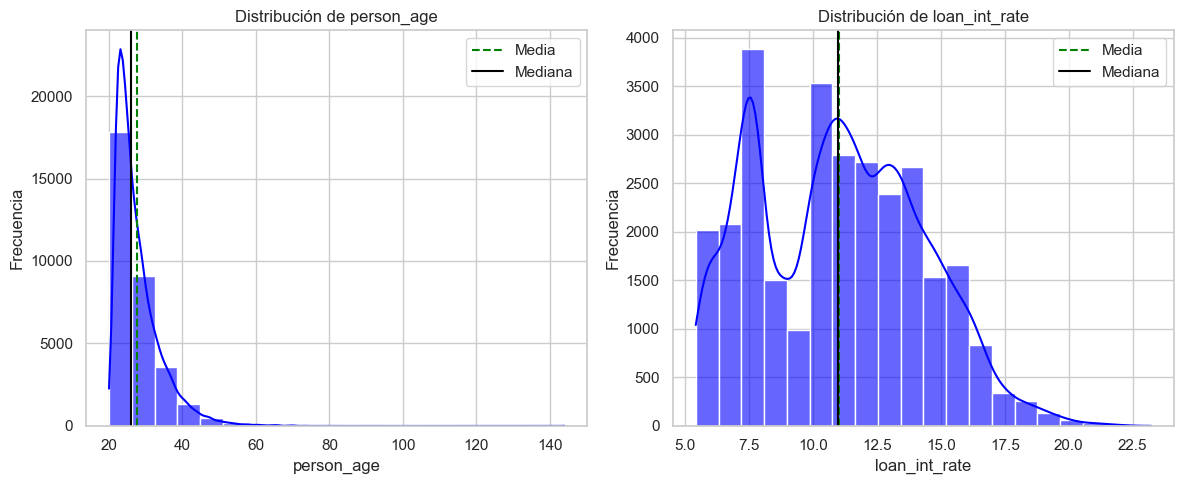

In [83]:
sns.set_theme(style="whitegrid")

# Definir como variable columnas de interes
variables_example = ['person_age', 'loan_int_rate']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i, variable in enumerate(variables_example):
    # Histograma y KDE
    sns.histplot(numerical_df[variable], bins=20, kde=True, ax=axes[i], color='blue', alpha=0.6)
    axes[i].axvline(x=numerical_df[variable].mean(), color='green', linestyle='--', label='Media')
    axes[i].axvline(x=numerical_df[variable].median(), color='black', linestyle='-', label='Mediana')
    axes[i].set_title(f'Distribución de {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend()

plt.tight_layout()
plt.show()

<span style="color: #FF8C00;">_En el caso especifico de `person_age` y de `loan_int_rate` se cumple lo dicho anteriormente de que presentan una asimetría de cola derecha. En el caso de la variable `loan_int_rate`, debido a que tiene una asimetría más cercana al 0, la media se asemeja un poco más a la mediana que en el caso de `person_age`; sin embargo, presenta el comportamiento en asimetría mencionado anteriormente. Por el otro lado, en el resto de variables también se presenta una asimetría de cola derecha debido a que los valores de todas las skewness son positivos, aunque no se presentan distribuciones suaves de los datos, presentando diversos máximos y mínimos (significando diversas modas) en el análisis de KDE._</span>

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

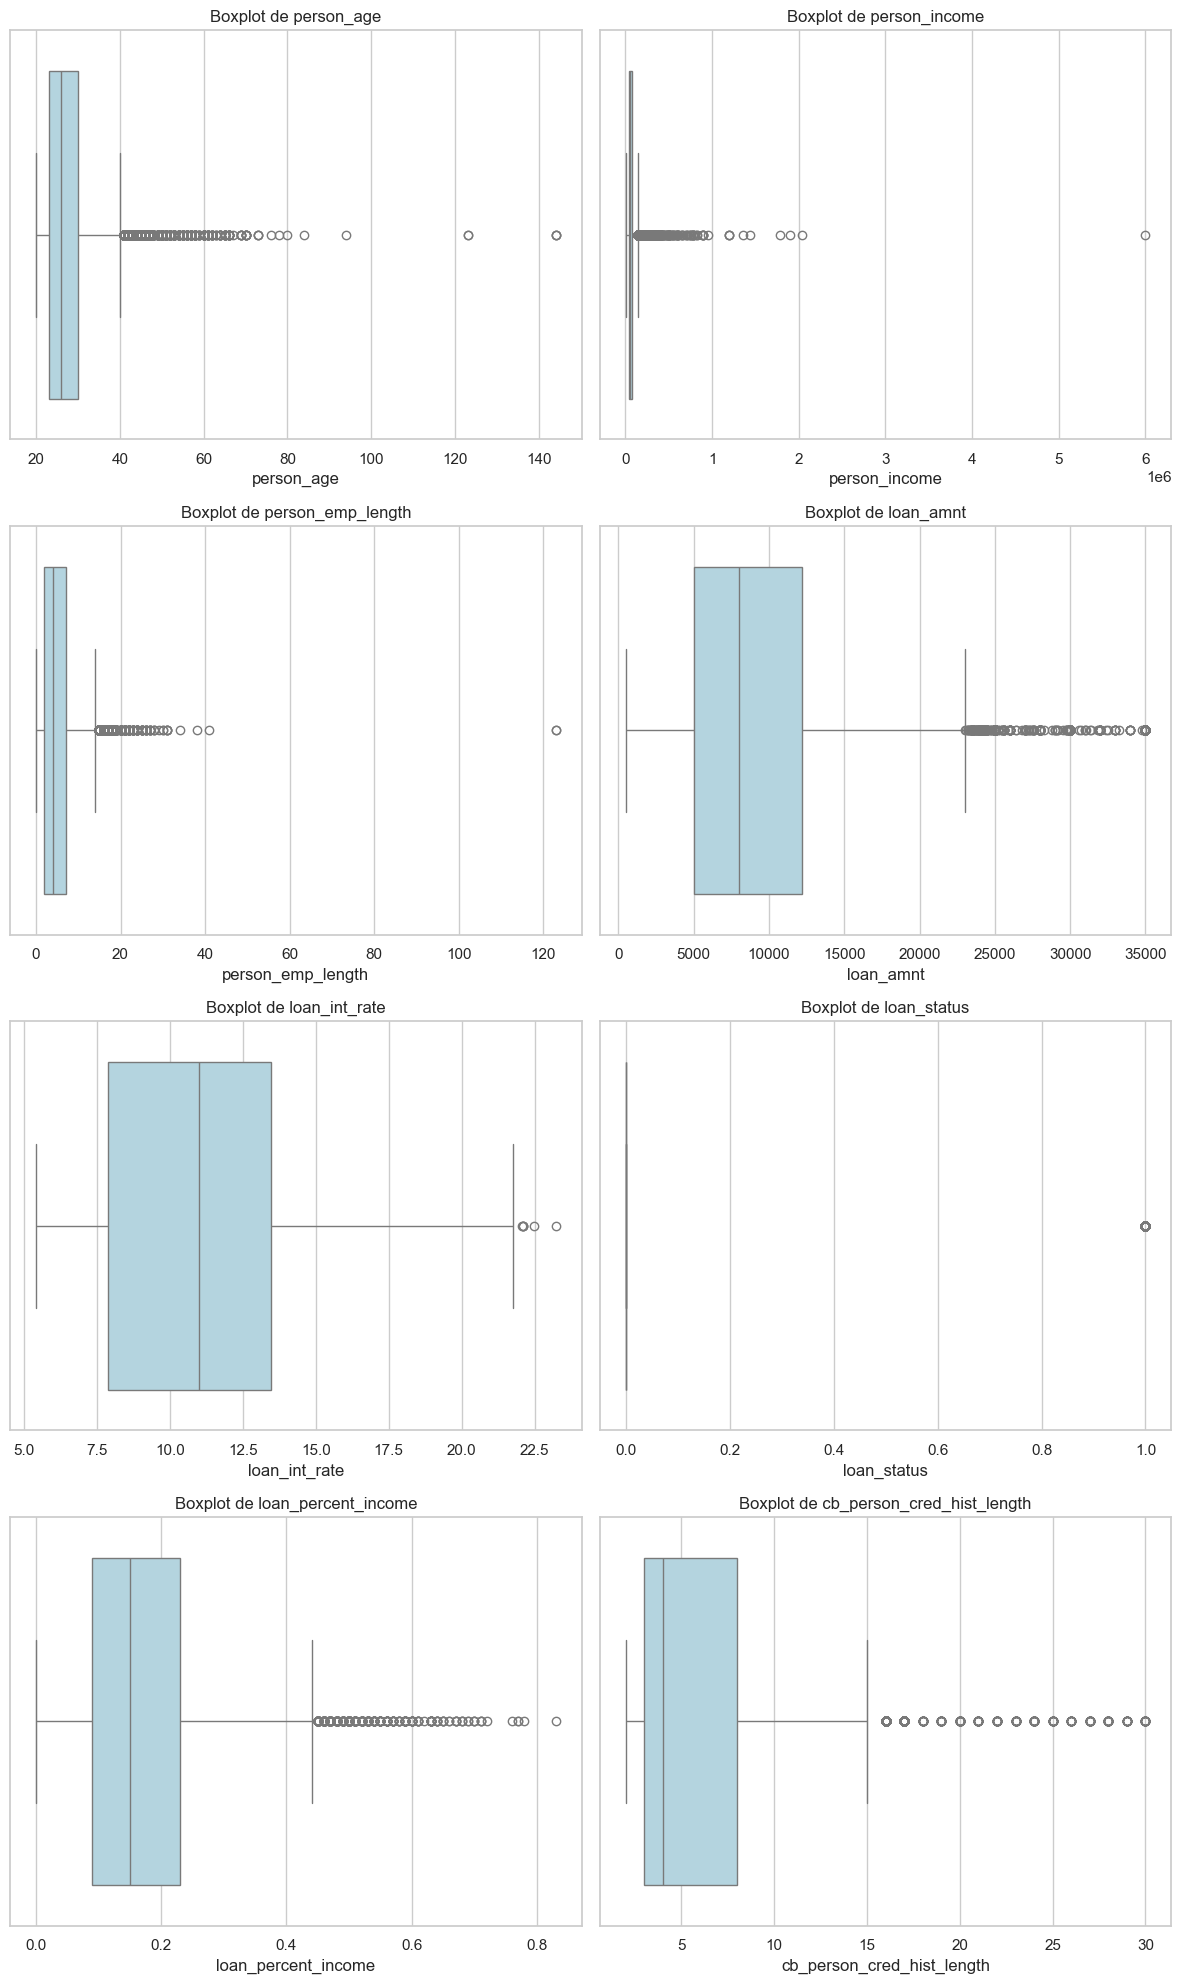

In [84]:
# Crear un boxplot para cada variable
plt.figure(figsize=(12, nrows * 5)) 

for i, variable in enumerate(variables):
    #Boxplot
    plt.subplot(nrows, 2, i + 1) 
    sns.boxplot(data=numerical_df, x=variable, color='lightblue', showfliers=True)
    plt.title(f'Boxplot de {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [85]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


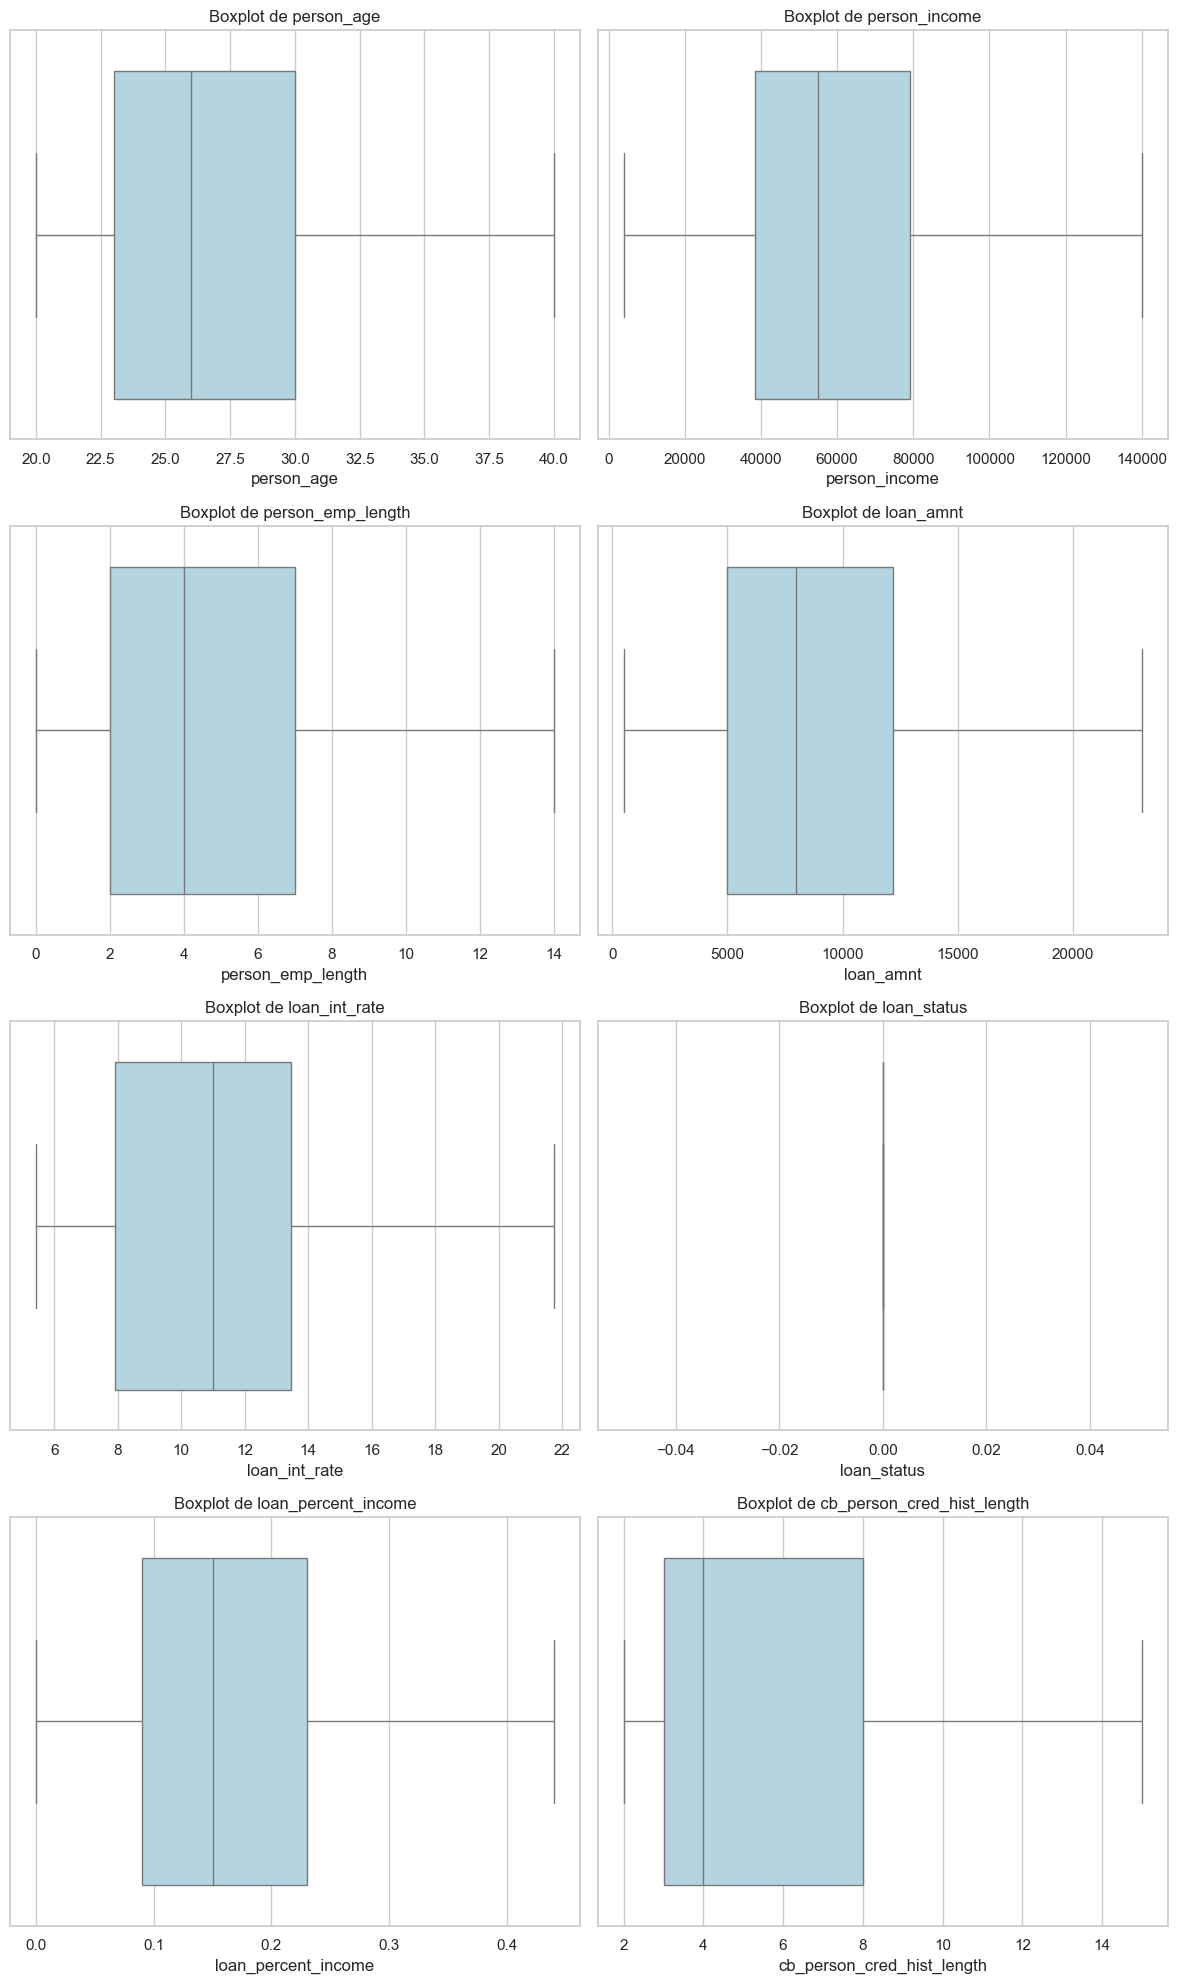

In [86]:
# Crear un boxplot para cada variable
plt.figure(figsize=(12, nrows * 5)) 

for i, variable in enumerate(variables):
    #Boxplot
    plt.subplot(nrows, 2, i + 1) 
    sns.boxplot(data=numerical_df, x=variable, color='lightblue', showfliers=False) #Indicar que no muestre outliers
    plt.title(f'Boxplot de {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [87]:
#Dataframe con columnas cualitativas
text_df = df.select_dtypes(include=['object'])
text_df

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [88]:
text_df.describe(include = 'object').T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [89]:
value_counts_dict = {}

#Crear dataframe con el numero de ocurrencias para cada valor unico
for column in text_df.columns:
    value_counts_dict[column] = text_df[column].value_counts()

value_counts_df = pd.concat(value_counts_dict, axis=1).fillna('').astype(object)

value_counts_df.index.name = 'Unique Values'
value_counts_df.columns = value_counts_df.columns.map(str)
value_counts_df

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
Unique Values,,,,
RENT,16446.0,,,
MORTGAGE,13444.0,,,
OWN,2584.0,,,
OTHER,107.0,,,
EDUCATION,,6453.0,,
MEDICAL,,6071.0,,
VENTURE,,5719.0,,
PERSONAL,,5521.0,,
DEBTCONSOLIDATION,,5212.0,,


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

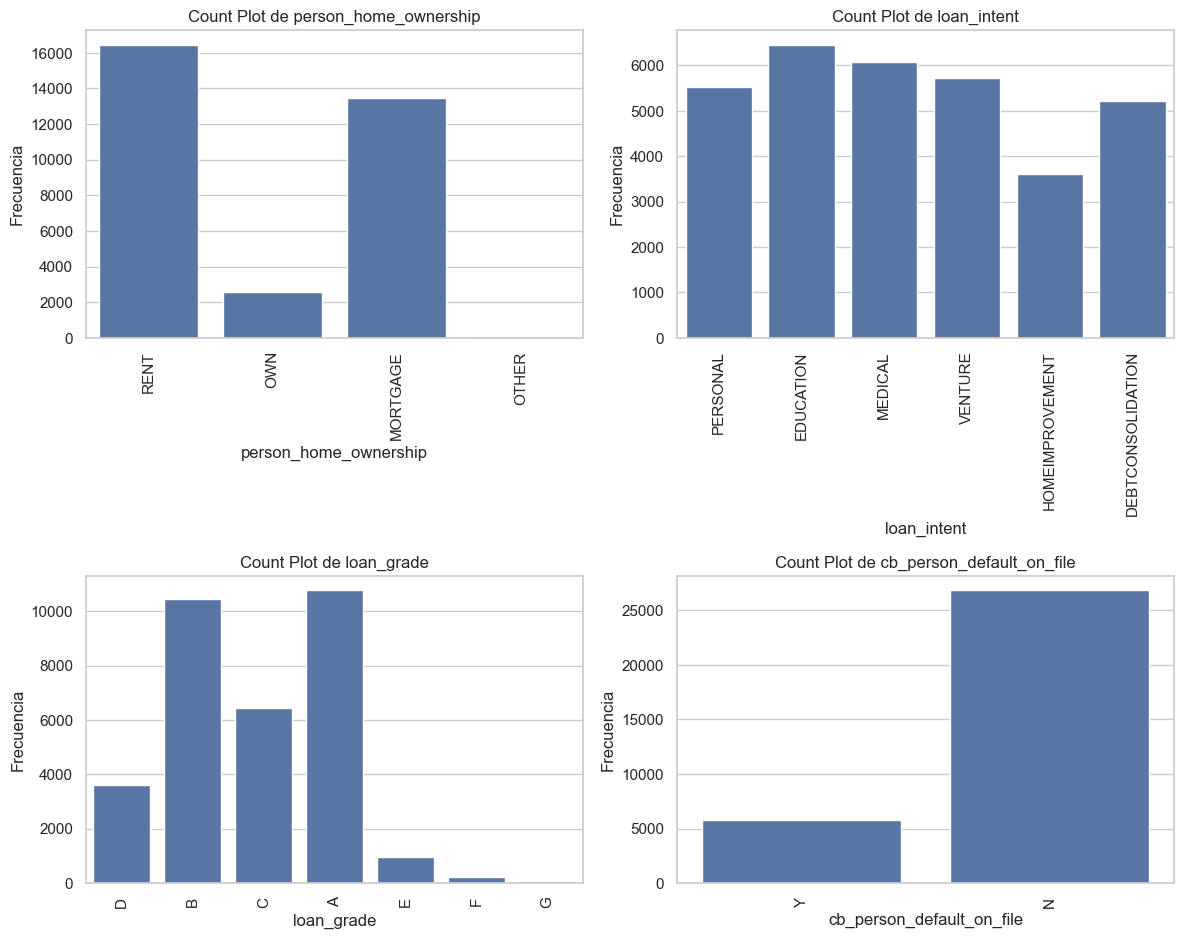

In [90]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, nrows * 5))  

for i, column in enumerate(text_df.columns):
    #Grafico de barras
    plt.subplot(nrows, 2, i + 1)  
    sns.countplot(x=column, data=text_df)  # Frecuencia de cada categoria
    plt.title(f'Count Plot de {column}')  
    plt.xlabel(column)  
    plt.xticks(rotation=90)  
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

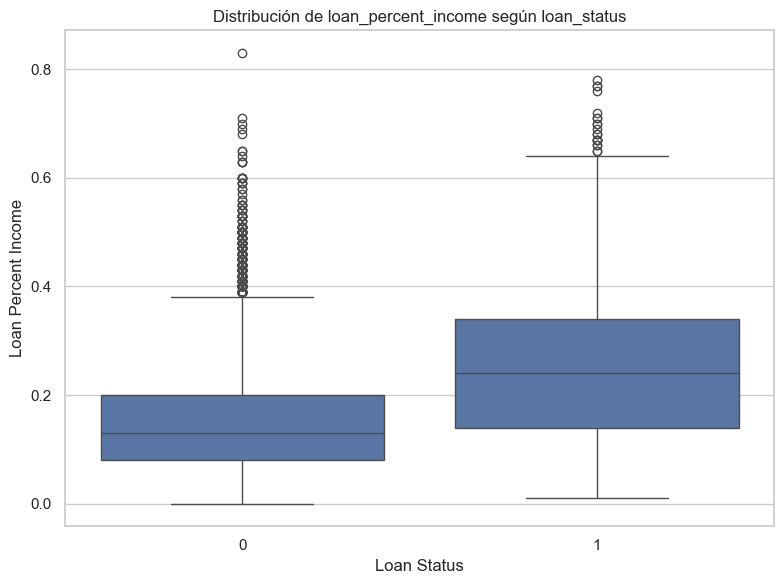

In [91]:
sns.set_theme(style="whitegrid")

# Crear el boxplot bivariante
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)

plt.title('Distribución de loan_percent_income según loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Percent Income')

plt.tight_layout()
plt.show()

<span style="color: #FF8C00;">_La gráfica sugiere que las personas en incumplimiento tienden a tener una mayor relación préstamo-ingreso que las personas que no incumplen. En otras palabras, cuando un mayor porcentaje de los ingresos de una persona se destina al pago de un préstamo, es más probable que enfrente dificultades para cumplir con sus pagos. Esto se evidencia en la distribución de los datos en el boxplot, donde incluso el primer cuartil de la relación préstamo-ingreso de las personas en incumplimiento se concentra en valores superiores a la media de aquellas que no incumplen._</span>

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

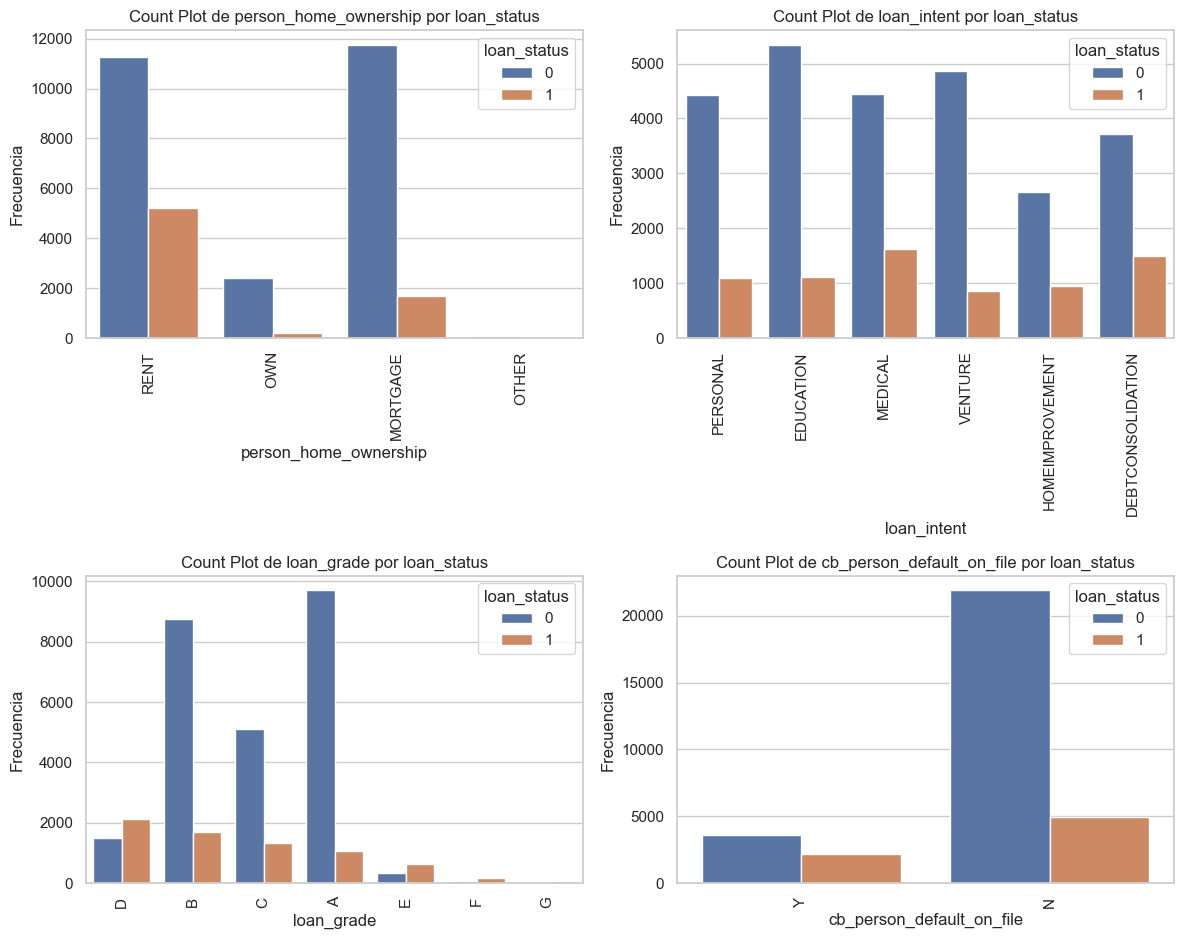

In [92]:
sns.set_theme(style="whitegrid")

nrows = 4

plt.figure(figsize=(12, nrows * 5))  

for i, column in enumerate(text_df.columns):
    # Gráfico de barras
    plt.subplot(nrows, 2, i + 1)  
    sns.countplot(x=column, hue='loan_status', data=df)  # Frecuencia de cada categoría según loan_status
    plt.title(f'Count Plot de {column} por loan_status')  
    plt.xlabel(column)  
    plt.xticks(rotation=90)  
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

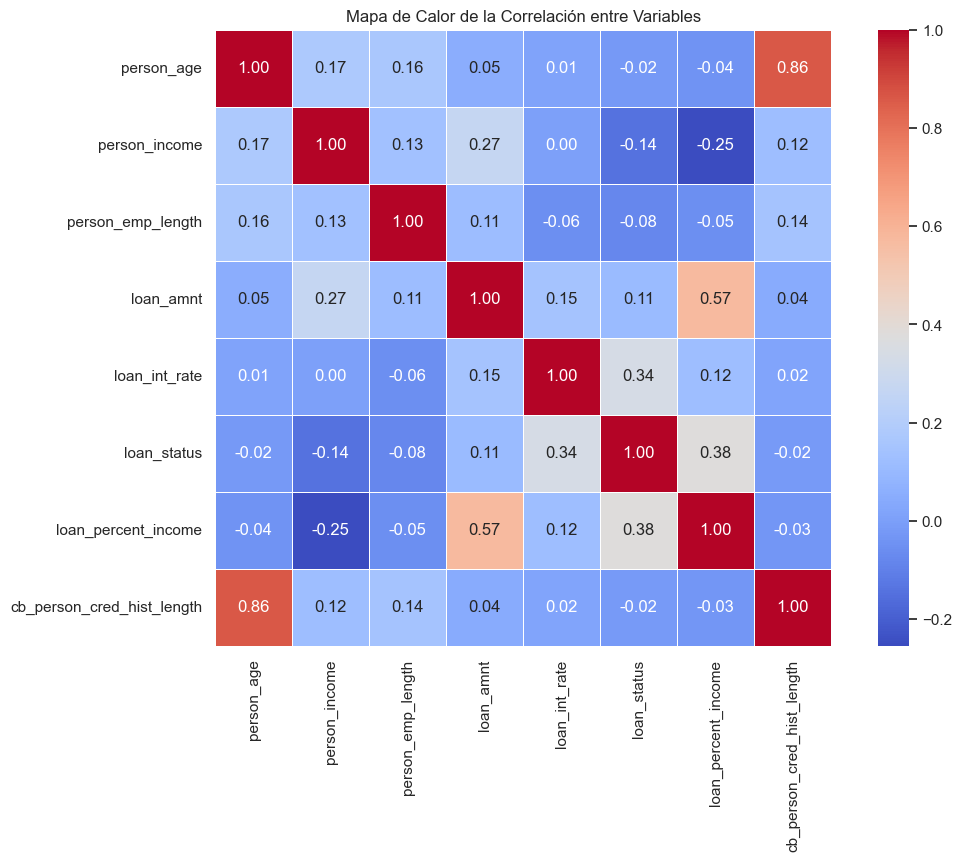

In [93]:
# Calcular la correlación para todas las variables
correlation = numerical_df.corr()

# Mapa de calor para visualizar la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f", cbar=True, square=True, linewidths=0.5)
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.show()

<span style="color: #FF8C00;">_Excluyendose a si misma, `loan_status` tiene mayor correlación contra la variable de `loan_percent_income` con un coeficinte de correlación de Pearson de 0.38 entre ambas variables._</span>